In [34]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
#from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# Generate data
np.random.seed(2)

In [35]:
X = np.random.standard_normal((50,2))
X

array([[-1.41622753,  0.879899  ],
       [ 1.37459323, -0.45104291],
       [ 0.61353263, -0.21015656],
       [ 0.40805817,  1.73239851],
       [-0.34944796, -1.23313682],
       [ 0.71827439,  0.51655963],
       [ 0.67380149,  1.02645497],
       [-0.68114843, -1.96601472],
       [ 1.04090637, -0.40865031],
       [-1.20740046, -1.16829028],
       [ 1.12837333,  0.18083331],
       [ 0.30290203,  0.85038687],
       [-0.67690095, -1.12511459],
       [-0.85295128, -1.10457461],
       [-0.2910958 , -0.89097573],
       [ 0.03863521, -0.48084914],
       [-0.07997949,  0.64979034],
       [ 1.40127689,  1.55593792],
       [ 0.11492218,  0.21237029],
       [-0.50838023,  1.00598199],
       [ 1.53179086, -0.5936018 ],
       [ 0.76410567, -0.32956654],
       [-0.17111499,  0.18428476],
       [-0.40117682,  0.89510438],
       [-1.49585236, -0.69539691],
       [-0.11941144, -1.0448237 ],
       [ 0.36063798, -1.5149043 ],
       [ 0.05517757, -1.44026488],
       [-0.14524674,

In [36]:
X[:25,0] = X[:25,0]+3
X

array([[ 1.58377247,  0.879899  ],
       [ 4.37459323, -0.45104291],
       [ 3.61353263, -0.21015656],
       [ 3.40805817,  1.73239851],
       [ 2.65055204, -1.23313682],
       [ 3.71827439,  0.51655963],
       [ 3.67380149,  1.02645497],
       [ 2.31885157, -1.96601472],
       [ 4.04090637, -0.40865031],
       [ 1.79259954, -1.16829028],
       [ 4.12837333,  0.18083331],
       [ 3.30290203,  0.85038687],
       [ 2.32309905, -1.12511459],
       [ 2.14704872, -1.10457461],
       [ 2.7089042 , -0.89097573],
       [ 3.03863521, -0.48084914],
       [ 2.92002051,  0.64979034],
       [ 4.40127689,  1.55593792],
       [ 3.11492218,  0.21237029],
       [ 2.49161977,  1.00598199],
       [ 4.53179086, -0.5936018 ],
       [ 3.76410567, -0.32956654],
       [ 2.82888501,  0.18428476],
       [ 2.59882318,  0.89510438],
       [ 1.50414764, -0.69539691],
       [-0.11941144, -1.0448237 ],
       [ 0.36063798, -1.5149043 ],
       [ 0.05517757, -1.44026488],
       [-0.14524674,

In [11]:
#X[:10,0] = X[:10,0]+3
#X

array([[ 2.62848088,  3.16096597],
       [ 3.10995101, -1.91352322],
       [ 3.59982043,  0.54938447],
       [ 4.38378103,  0.14834924],
       [ 2.34645856,  1.40883398],
       [ 3.71206123, -1.80071604],
       [ 3.74759894, -0.232897  ],
       [ 4.11064528, -0.37333881],
       [ 3.78614607,  0.1941687 ],
       [ 3.5862041 , -0.02038729]])

In [12]:
#X[:10,1] = X[:10,1]-4
#X

array([[ 2.62848088, -0.83903403],
       [ 3.10995101, -5.91352322],
       [ 3.59982043, -3.45061553],
       [ 4.38378103, -3.85165076],
       [ 2.34645856, -2.59116602],
       [ 3.71206123, -5.80071604],
       [ 3.74759894, -4.232897  ],
       [ 4.11064528, -4.37333881],
       [ 3.78614607, -3.8058313 ],
       [ 3.5862041 , -4.02038729]])

In [37]:
X[:25,1] = X[:25,1]-4
X

array([[ 1.58377247, -3.120101  ],
       [ 4.37459323, -4.45104291],
       [ 3.61353263, -4.21015656],
       [ 3.40805817, -2.26760149],
       [ 2.65055204, -5.23313682],
       [ 3.71827439, -3.48344037],
       [ 3.67380149, -2.97354503],
       [ 2.31885157, -5.96601472],
       [ 4.04090637, -4.40865031],
       [ 1.79259954, -5.16829028],
       [ 4.12837333, -3.81916669],
       [ 3.30290203, -3.14961313],
       [ 2.32309905, -5.12511459],
       [ 2.14704872, -5.10457461],
       [ 2.7089042 , -4.89097573],
       [ 3.03863521, -4.48084914],
       [ 2.92002051, -3.35020966],
       [ 4.40127689, -2.44406208],
       [ 3.11492218, -3.78762971],
       [ 2.49161977, -2.99401801],
       [ 4.53179086, -4.5936018 ],
       [ 3.76410567, -4.32956654],
       [ 2.82888501, -3.81571524],
       [ 2.59882318, -3.10489562],
       [ 1.50414764, -4.69539691],
       [-0.11941144, -1.0448237 ],
       [ 0.36063798, -1.5149043 ],
       [ 0.05517757, -1.44026488],
       [-0.14524674,

K = 2

In [39]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

K = 3

In [42]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
km2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2])

In [44]:
pd.Series(km2.labels_).value_counts()

1    25
2    18
0     7
dtype: int64

In [45]:
km2.cluster_centers_

array([[ 1.63936703, -0.05089211],
       [ 3.07917985, -4.03869476],
       [-0.35413785, -0.26962427]])

In [46]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

71.23749384388643

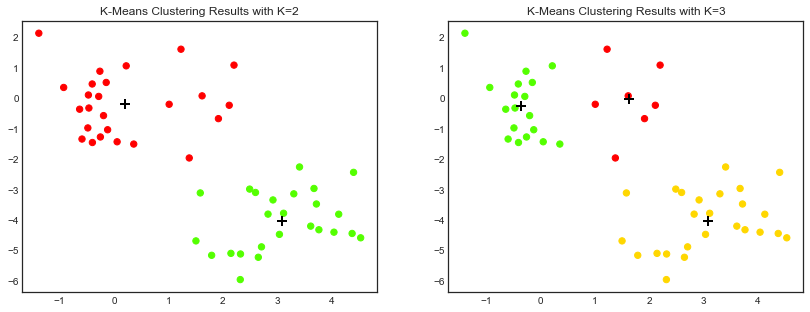

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);